In [2]:
import pandas as pd
import numpy as np
import re

pd.options.display.max_columns = None

### `Question-1:`

The dataset is based on NFTs. This is quite large. So, when you will read the dataset, you have to wait. The link of the dataset: https://tinyurl.com/2pfhncqw

Your task is to make a pivote table by using the columns "verification_status", "contract_type", "rarity_score" and "last_sale_price" to find out the total values.

In [39]:
df = pd.read_csv('data/nfts_train.csv')

In [40]:
df.head(5)

,Unnamed: 0,rarity_score,last_sale_date,last_sale_price,total_supply,creation_date,verification_status,n_of_traits,contract_type,seller_fees,platform_fees,openrarity_enabled,has_website,has_own_twitter,has_discord,has_medium,n_tweets_in_range,avg_likes,avg_replies,avg_retweets,min_likes,min_replies,min_retweets,max_likes,max_replies,max_retweets
0,0,2.000000,2022-11,1.266732,1,2022-04,verified,2,own,1000.0,250,False,False,True,True,False,31,187.967742,8.290323,60.935484,0,0,2,591,28,380
1,1,97.077216,2021-08,1.200357,8888,2021-07,verified,5,own,500.0,250,False,False,True,True,False,11,133.181818,13.454545,55.181818,0,0,7,402,47,239
2,2,139.453086,2022-08,3.180572,8888,2021-07,verified,5,own,500.0,250,False,False,True,True,False,11,133.181818,13.454545,55.181818,0,0,7,402,47,239
3,3,127.753445,2021-08,3.502910,8888,2021-07,verified,5,own,500.0,250,False,False,True,True,False,11,133.181818,13.454545,55.181818,0,0,7,402,47,239
4,4,112.315719,2022-09,4.009567,8888,2021-07,verified,5,own,500.0,250,False,False,True,True,False,11,133.181818,13.454545,55.181818,0,0,7,402,47,239


In [41]:
df.pivot_table(index='verification_status',columns='contract_type',values=['rarity_score','last_sale_price'],aggfunc='sum')

last_sale_price                 rarity_score              
contract_type               default            own       default           own
verification_status                                                           
approved                 658.931935    1684.819488  3.973082e+08  3.929607e+06
verified                 370.304092  667394.862655  2.475007e+06  4.165654e+07

### `Question-2:`

You are given a dataset about the cars' price and miles driven of different cars throughout the different years. The link of the dataset: https://tinyurl.com/2r24n45l. Your tasks are
- make a pivot table of the brands (the required brands are given below) from the "Year" 2018 to the year 2022 in which the "Price" is shown as average values and "Miles" are in median values. In this pivote table, every row represents a particular brand and each column represents either average "Price" of a partucular year or median values of "Miles" of a particular year.
- At the end plot a kde chart for the "Price" and "Miles" by using your pivot table.

There are some challenges to solve this task:
- There is no column that is represented to the brand name of the car. You have to find out on your own.
- Some values of "Years" column are misleading. You have to reset this column too that every value should tell a valid meaning.

In [43]:
# code here
df = pd.read_csv('data/carvana.csv')
df.head(5)

,Name,Year,Miles,Price
0,Chevrolet Trax,2018,41946,16990
1,GMC Terrain,2020,45328,23990
2,Jeep Wrangler,2012,81068,21590
3,Jeep Renegade,2019,35372,21590
4,BMW X,20173,68992,22990


In [44]:
df['brand'] = df['Name'].str.split(' ',n=1).str.get(0)
df.head(5)

,Name,Year,Miles,Price,brand
0,Chevrolet Trax,2018,41946,16990,Chevrolet
1,GMC Terrain,2020,45328,23990,GMC
2,Jeep Wrangler,2012,81068,21590,Jeep
3,Jeep Renegade,2019,35372,21590,Jeep
4,BMW X,20173,68992,22990,BMW


In [45]:
df['Year'] = df['Year'].astype(str)

In [46]:
df['Year'] = df['Year'].str[:4]

In [48]:
df['Year'] = df['Year'].astype(int)

In [50]:
pt = df.query('Year >= 2018 and Year <= 2022').pivot_table(index='brand',columns='Year',values=['Price','Miles'],aggfunc={'Price':'mean','Miles':'median'})

<Axes: ylabel='Density'>

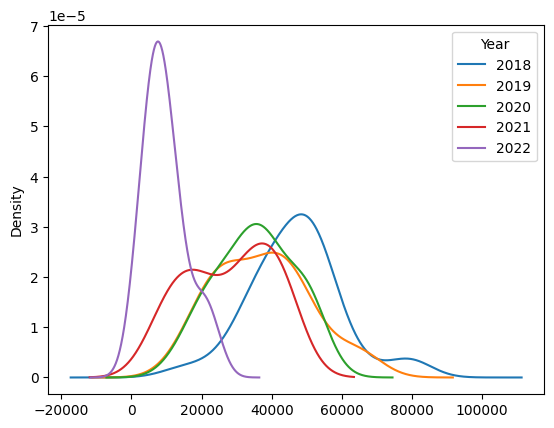

In [51]:
pt['Miles'].plot(kind='kde')

<Axes: ylabel='Density'>

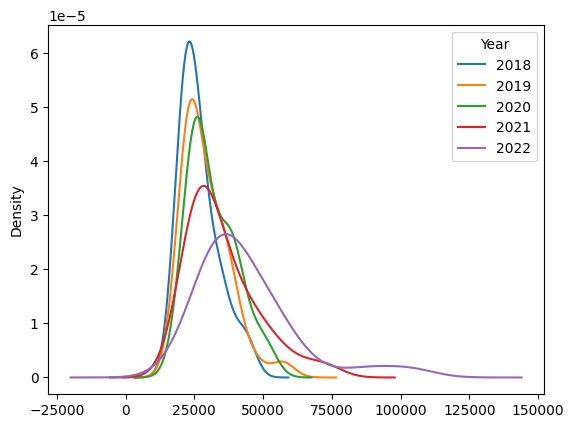

In [52]:
pt['Price'].plot(kind='kde')

### `Question-3:`

You are given a dataset of **Daily Power Generation in India** of regional wise of all Power Stations. Link of the dataset: https://tinyurl.com/2nq6kugt

Task
- In this dataset, there are many columns. Two of them are `Actual(MU)` and `Excess(+) / Shortfall (-)`. `Actual(MU)` represents the actual power generation. `Excess(+) / Shortfall (-)` tells is that generated power is excess or shortfall for that particular day of a power station. You have to find out what should be the actual power generation required for that day by the power stations that there would not be any excess or shorfall power. For the result, make a new column.
- Find out the month of the day and store it as a new column.
- Find out top 10 frequently appeared power stations in this dataframe.
- Next create a pivot table of which every row represents a power station and every column represents a month in a order. Like January, February, March...
- It is hard to get inside if you look through the only pivot table. So plot the pivot table.

In [53]:
df = pd.read_csv('data/PowerGeneration.csv')

In [54]:
df.shape

(345273, 11)

In [55]:
df['required'] = df['Actual(MU)'] - df['Excess(+) / Shortfall (-)']

In [56]:
df.head()

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation,required
0,2017-09-01,Delhi,2235.4,135.00,0.00,135.0,0,13,18,5.00,0.0,13.00
1,2017-09-01,Haryana,2720.0,2470.00,0.00,2470.0,0,28,7,-21.80,0.0,28.80
2,2017-09-01,Himachal Pradesh,3378.0,379.00,0.00,231.0,0,40,46,5.63,0.0,40.37
3,2017-09-01,Jammu and Kashmir,1285.0,150.00,0.00,0.0,0,14,23,9.43,0.0,13.57
4,2017-09-01,Punjab,3826.3,2697.65,77.65,2620.0,0,39,17,-21.69,0.0,38.69


In [57]:
df['month'] = pd.to_datetime(df['Dates']).dt.month_name()
df.head()

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation,required,month
0,2017-09-01,Delhi,2235.4,135.00,0.00,135.0,0,13,18,5.00,0.0,13.00,September
1,2017-09-01,Haryana,2720.0,2470.00,0.00,2470.0,0,28,7,-21.80,0.0,28.80,September
2,2017-09-01,Himachal Pradesh,3378.0,379.00,0.00,231.0,0,40,46,5.63,0.0,40.37,September
3,2017-09-01,Jammu and Kashmir,1285.0,150.00,0.00,0.0,0,14,23,9.43,0.0,13.57,September
4,2017-09-01,Punjab,3826.3,2697.65,77.65,2620.0,0,39,17,-21.69,0.0,38.69,September


In [58]:
top_10 = df['Power Station'].value_counts().head(10).index.to_list()

In [59]:
pt = df[df['Power Station'].isin(top_10)].pivot_table(index='month',columns='Power Station',values='required',aggfunc='sum')

<Axes: xlabel='month'>

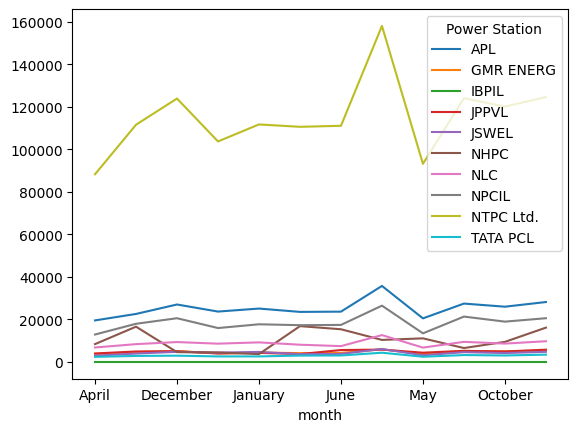

In [60]:
pt.plot(kind='line')

###`Q-4` You are given a file `question-answer.csv`. Your task is to make a dataframe from it with two columns - `question` and `answers`.

* Questions in the file start from `Q<number>`; E.g.  `Q1` denotes question no. `1`
* Answers starts from `Ans<number>`; Eg. `Ans1` denotes answer of question no `1`
* MAke sure you look at columns name carefully

CSV File - "https://drive.google.com/file/d/10rmV3XrVtzpDTtYZF3UtCdcU0ajBJjGY/view?usp=share_link"

In [61]:
df = pd.read_csv("data/question-answer.csv")
df

,Unnamed: 0,2
0,0,Q1-What is Data Science?
1,1,"Ans1-Data Science combines statistics, maths, ..."
2,2,Q2-2. How is logistic regression done?
3,3,Ans2-Logistic regression measures the relation...
4,4,Q3-How do you build a random forest model?
5,5,Ans3-A random forest is built up of a number o...
6,6,Q4-How can you avoid overfitting your model?
7,7,Ans4-Overfitting refers to a model that is onl...
8,8,Q5-You are given a data set consisting of vari...
9,9,Ans5-The following are ways to handle missing ...


In [62]:
ques = df['2'][df['2'].str.startswith('Q')].str.split("-").str.get(1).reset_index()

In [63]:
ans = df['2'][df['2'].str.startswith('A')].str.split("-").str.get(1).reset_index()

In [64]:
result = ques.merge(ans, left_index=True, right_index=True).drop(columns=['index_x','index_y']).rename(columns={'2_x':'Question','2_y':'Answer'})

In [65]:
result

,Question,Answer
0,What is Data Science?,"Data Science combines statistics, maths, speci..."
1,2. How is logistic regression done?,Logistic regression measures the relationship ...
2,How do you build a random forest model?,A random forest is built up of a number of dec...
3,How can you avoid overfitting your model?,Overfitting refers to a model that is only set...
4,You are given a data set consisting of variabl...,The following are ways to handle missing data ...
5,What is bag of words? How we can use it for te...,Bag of Words is a representation of text that ...
6,How can we use machine learning for text class...,Machine learning classification algorithms pre...
7,What is a time series?,A time series is a set of observations ordered...
8,How is time series different from the usual re...,The principle behind causal forecasting is tha...
9,What are the different types of joins? What ar...,(INNER) JOIN: Returns records that have matchi...


###`Q-5`: Print Question and answer of those questions which does not contains any question mark (`?`).


In [66]:
# code here
result[~result['Question'].str.contains('\?')]

,Question,Answer


###`Q 6-10` LOG and EMPLOYEE
6. Show `activity` details month wise. Show count for each `activity`
7. Find employee who did most `activity` in January month.
8. Employee who have worked most no of times on Weekends.
9. Which activity is logged most on buisness days.
10. Week Days wise activity table.
```
log_file = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT-OMrmmNdOTM-B5f5F1EpCutMVG230UZiLvqlsg0NIKUKR3yrqiI2r1pEX-LvSEk-3WwySPYtvbBC-/pub?gid=1937029224&single=true&output=csv")
employee = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQ5AuFqRjSZVBKm5zyDxquX6utubq1DJKkYDI70vjeidAnyAu70KMSYpMYzeVSNVTeUIJBpfF6jU5E6/pub?gid=798824749&single=true&output=csv")

```

Note(for common field):- Employee file has `EMPLOYEE_ID` and LOG file has `emp_id`

In [6]:
log_file = pd.read_csv('data/equip_log.csv')
employee = pd.read_csv('data/employee.csv')

In [7]:
log_file.head(5)

,Log_ID,dt,dept,emp_id,activity,eqpt
0,1000,2022-01-07,Dept6,115,Cleaning,UPS
1,1001,2022-01-08,Dept4,105,Cleaning,Generator
2,1002,2022-01-09,Dept3,112,Inspection,CPU
3,1003,2022-01-10,Dept4,120,Inspection,UPS
4,1004,2022-01-11,Dept3,138,Checking,Battery


In [8]:
employee.head(5)

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL
0,100,Steven,King,SKING
1,101,Neena,Kochhar,NKOCHHAR
2,102,Lex,De Haan,LDEHAAN
3,103,Alexander,Hunold,AHUNOLD
4,104,Bruce,Ernst,BERNST


In [12]:
emp_merge = employee.merge(log_file,how='inner',left_on='EMPLOYEE_ID',right_on='emp_id')

In [13]:
emp_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   EMPLOYEE_ID  295 non-null    int64 
 1   FIRST_NAME   281 non-null    object
 2   LAST_NAME    295 non-null    object
 3   EMAIL        295 non-null    object
 4   Log_ID       295 non-null    int64 
 5   dt           295 non-null    object
 6   dept         295 non-null    object
 7   emp_id       295 non-null    int64 
 8   activity     295 non-null    object
 9   eqpt         295 non-null    object
dtypes: int64(3), object(7)
memory usage: 23.2+ KB


In [14]:
emp_merge.head(5)

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,Log_ID,dt,dept,emp_id,activity,eqpt
0,100,Steven,King,SKING,1116,2022-05-03,Dept2,100,Checking,CPU
1,100,Steven,King,SKING,1139,2022-05-26,Dept2,100,Cleaning,UPS
2,100,Steven,King,SKING,1181,2022-07-07,Dept6,100,Cleaning,CPU
3,100,Steven,King,SKING,1191,2022-07-17,Dept4,100,Cleaning,Server
4,100,Steven,King,SKING,1269,2022-10-03,Dept6,100,Repair,UPS


In [16]:
emp_merge['Date'] = pd.to_datetime(emp_merge['dt'])

In [18]:
emp_merge['month_name'] = emp_merge['Date'].dt.month_name()

In [19]:
emp_merge.head(5)

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,Log_ID,dt,dept,emp_id,activity,eqpt,Date,month_name
0,100,Steven,King,SKING,1116,2022-05-03,Dept2,100,Checking,CPU,2022-05-03,May
1,100,Steven,King,SKING,1139,2022-05-26,Dept2,100,Cleaning,UPS,2022-05-26,May
2,100,Steven,King,SKING,1181,2022-07-07,Dept6,100,Cleaning,CPU,2022-07-07,July
3,100,Steven,King,SKING,1191,2022-07-17,Dept4,100,Cleaning,Server,2022-07-17,July
4,100,Steven,King,SKING,1269,2022-10-03,Dept6,100,Repair,UPS,2022-10-03,October


In [25]:
#1
emp_merge.pivot_table(index='month_name',columns='activity',aggfunc='count')['Log_ID']

activity,Checking,Cleaning,Inspection,Repair
month_name,,,,
April,3,9,7,2
August,7,9,9,4
December,5,4,7,5
February,4,6,4,10
January,6,9,7,5
July,5,5,10,2
June,4,5,8,9
March,6,4,4,12
May,4,7,6,8


In [27]:
# 7. Find employee who did most `activity` in January month.
emp_merge.query('month_name == "January"')['emp_id'].value_counts().head(1)

emp_id
122    3
Name: count, dtype: int64

In [29]:
# 8. Employee who have worked most no of times on Weekends.
emp_merge[emp_merge['Date'].dt.day_of_week > 4]['emp_id'].value_counts().head(1)

emp_id
109    5
Name: count, dtype: int64

In [30]:
# 9. Which activity is logged most on buisness days.
emp_merge[emp_merge['Date'].dt.day_of_week <= 4]['activity'].value_counts().head(1)

activity
Inspection    62
Name: count, dtype: int64

In [32]:
#10. Week Days wise activity table.
emp_merge['day'] = emp_merge['Date'].dt.day_name()
emp_merge.pivot_table(index='day',columns='activity',aggfunc='count')['Log_ID']

activity,Checking,Cleaning,Inspection,Repair
day,,,,
Friday,7,15,15,8
Monday,9,9,11,12
Saturday,9,8,6,11
Sunday,11,9,13,11
Thursday,8,14,14,11
Tuesday,12,8,13,11
Wednesday,13,9,9,9


### `Q-11`:

1. There are missing value in first name of employee. Fill it using email and last name field.

> E.g- `email` -> JMURMAN and `last_name` -> 'Urman' -> so make it's first name as 'JM', Sort of (Email- lastname).

> Email is constructed from initials of first name concate with lastname. Your Task is to fill first name initials in missing data.

2. You can see email field don't have any domain name. Change this to full email addreess with domain as 'campusx.com'.
E.g- Email field -> `JMURMAN`  result -> `JMURMAN@CAMPUSX.COM`

3. Show Full Name of all the employees whose name starts with 'A' and has done any of these activity ['Incpection', 'Cleaning', 'Checking]

In [33]:
# code here
employee = pd.read_csv('data/employee.csv')
fill_values = employee[employee['FIRST_NAME'].isnull()].apply(lambda x:x['EMAIL'][0] + x['LAST_NAME'][0],axis=1)

In [34]:
fill_values

12    JU
21    AF
32    TO
dtype: object

In [35]:
employee['FIRST_NAME'].fillna(fill_values,inplace=True)

/var/folders/2n/v2zy3n991d94k9g19pvh8k5m0000gn/T/ipykernel_28078/553705550.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  employee['FIRST_NAME'].fillna(fill_values,inplace=True)


In [36]:
employee['EMAIL'] = employee['EMAIL'] + '@campusx.com'

In [37]:
employee

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL
0,100,Steven,King,SKING@campusx.com
1,101,Neena,Kochhar,NKOCHHAR@campusx.com
2,102,Lex,De Haan,LDEHAAN@campusx.com
3,103,Alexander,Hunold,AHUNOLD@campusx.com
4,104,Bruce,Ernst,BERNST@campusx.com
5,105,David,Austin,DAUSTIN@campusx.com
6,106,Valli,Pataballa,VPATABAL@campusx.com
7,107,Diana,Lorentz,DLORENTZ@campusx.com
8,108,Nancy,Greenberg,NGREENBE@campusx.com
9,109,Daniel,Faviet,DFAVIET@campusx.com
